In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import default_rng
import matplotlib
from scipy.stats import pearsonr, spearmanr, kendalltau

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
# matplotlib.verbose.level = 'debug-annoying'
matplotlib.pyplot.set_loglevel('warn')

thesis_fmt = {
    "ps.useafm": True,
    # "ps.usedistiller": "xpdf",
    "font.family": "serif",
    "font.serif": ['garamond','urw-garamond', 'Garamond 3 URW'],
    # "text.latex.preamble": r"\usepackage{mathdesign}",
    "text.latex.preamble": r"\usepackage{microtype}"
                           r"\usepackage{lmodern}"
                           r"\usepackage[scaled]{beramono}"
                           r"\usepackage[urw-garamond, uppercase=upright]{mathdesign}"
                           r"\renewcommand{\ttdefault}{lmtt}"
                           r"\usepackage{pifont}"
                           r"\usepackage{setspace}"
                           r"\linespread{1.05}"
                           r"\DeclareMathAlphabet{\xcal}{OMS}{cmsy}{m}{n}",
    # "mathtext.default": 'it',
    # "mathtext.fontset": 'custom',
    # "mathtext.rm": 'Garamond 3 URW Italic',
    # "mathtext.it": 'Garamond 3 URW Italic',
    'text.usetex': True,
    # "font.sans-serif": "Linux Biolinum",
    'font.size': 11,
    # 'pdf.fonttype': 42,
    #     'figure.facecolor': (0.98, 0.98, 0.98),
    #     'figure.facecolor':'#212121',
    #     'text.color': '#23373b',
    #     'axes.labelcolor': 'white',
    #     'xtick.color': 'white',
    #     'ytick.color': 'white',
    #     'axes.titlecolor':'white',
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'figure.figsize': (5, 2),
    'legend.borderaxespad': 0.5,
    'legend.fontsize': 'small',
    'legend.title_fontsize': 'small',
    #     'legend.facecolor':'white',
    #     "axes.labelpad": 20.0
    "axes.labelpad": 5.0,
    # 'axes.titlesize':38,
    #     'axes.labelsize':'medium'
}
plt.rcParams.update(thesis_fmt)

# plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  #
plt.close()

Describe :                X           Y
count  200.000000  200.000000
mean     0.547822    0.516282
std      0.554765    0.702339
min     -1.314245   -1.541349
25%      0.165104    0.006344
50%      0.577095    0.524100
75%      0.909741    0.997554
max      2.364705    2.330185


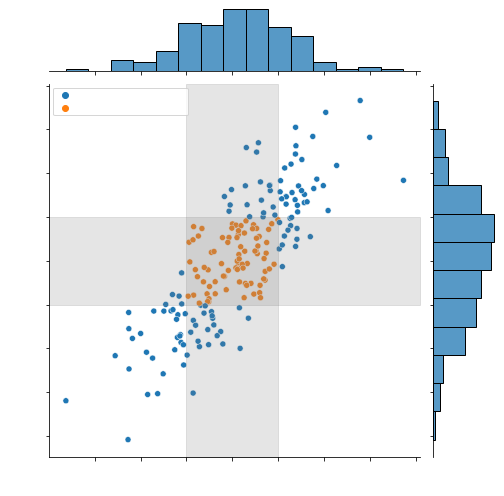

In [3]:
rng = default_rng(seed=1609)

n = 200
queries = ['q' + str(i) for i in range(1, n + 1)]
# X ~ N(0.5, 0.5^2)
# Y ~ X + N(0, 0.4^2)
# Y ~ N(0.5, 0.5^2 + 0.4^2)
X = rng.normal(loc=0.5, scale=0.5, size=n)
Y = X + rng.normal(loc=0, scale=0.4, size=n)
# True if within [0, 1] and False otherwise
ap_range = ((X >= 0) & (X <= 1)) & ((Y >= 0) & (Y <= 1))

_df = pd.DataFrame(data=np.array((X, Y)).T, index=queries, columns=['X', 'Y']).assign(AP=ap_range)
print(f'Describe :{_df.describe()}')
g = sns.jointplot(data=_df, x='X', y='Y', kind='scatter', height=7, ratio=5, marginal_ticks=False,
                  joint_kws=dict(hue=_df['AP']), legend=True)
ax = g.ax_joint
alpha = 0.2
ax.fill_between([0, 1], 0, 1, color='gray', alpha=alpha, transform=ax.get_xaxis_transform())
ax.fill_betweenx([0, 1], 0, 1, color='gray', alpha=alpha, transform=ax.get_yaxis_transform())
# plt.legend(loc='upper left', labels=['a', 'b'])
# change the labels in the legend
handles, labels = ax.get_legend_handles_labels()
sample_corr = f"Within restricted area $r={_df.loc[_df['AP'], ['X', 'Y']].corr().loc['X', 'Y']: .2g}$"
population_corr = f"Total $r={_df[['X', 'Y']].corr().loc['X', 'Y']: .2g}$"
ax.legend(handles, [population_corr, sample_corr], loc='upper left')
# plt.legend(loc='upper left', labels=['Outside', 'Inside'])
plt.savefig('plots/correlations_sample.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [4]:
_df['AP'].sum()

83

In [5]:
r, p1 = pearsonr(X, Y)
if p1 < 0.001:
    print(f'Pearson r={r:.2g}, p<0.001')
else:
    print(f'Pearson r={r:.2g}, p={p1:.2g}')


Pearson r=0.8, p<0.001


In [6]:
rh, p2 = spearmanr(X, Y)
if p2 < 0.001:
    print(f'Spearman rho={rh:.2g}, p<0.001')
else:
    print(f'Spearman rho={rh:.2g}, p<{p2:.2g}')

Spearman rho=0.8, p<0.001


In [7]:
tau, p3 = kendalltau(X, Y)
if p3 < 0.001:
    print(f'Kendall tau={tau:.2g}, p<0.001')
else:
    print(f'Kendall tau={tau:.2g}, p<{p3:.2g}')

Kendall tau=0.6, p<0.001


In [8]:
r, p1 = pearsonr(X[ap_range], Y[ap_range])
print(f'Sample Pearson r={r:.2g}, p={p1:.2g}')

Sample Pearson r=0.24, p=0.032


In [9]:
rh, p2 = spearmanr(X[ap_range], Y[ap_range])
print(f'Sample Spearman r={rh:.2g}, p={p2:.2g}')

Sample Spearman r=0.2, p=0.063


In [10]:
tau, p3 = kendalltau(X[ap_range], Y[ap_range])
print(f'Sample Kendall tau={tau:.2g}, p={p3:.2g}')

Sample Kendall tau=0.15, p=0.045
